## 3장 : 딥러닝

In [1]:
# import modules

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 3.2.2 계단 함수 구현하기
def step_function(x):
    y = x>0
    return y.astype(int) # np.int는 더 이상 사용되지 않는다.

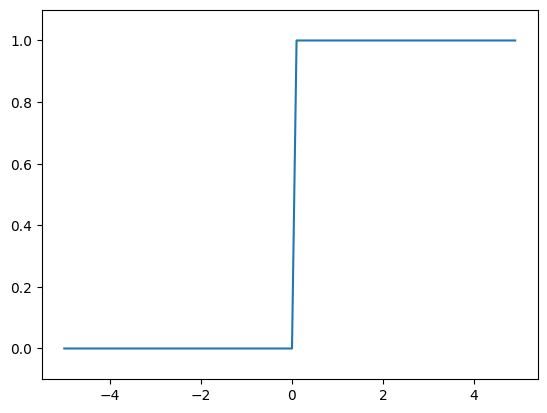

In [3]:
# 3.2.3 계단 함수의 그래프
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

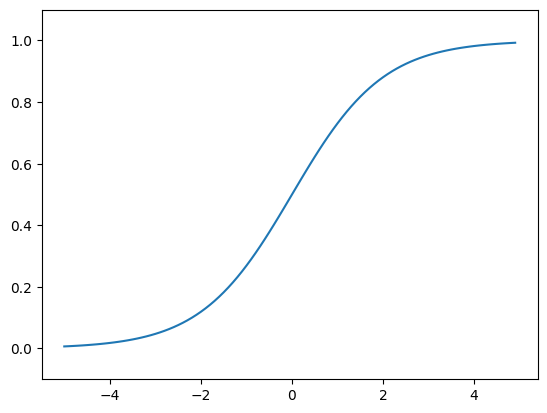

In [4]:
# 3.2.4 시그모이드 함수 구현하기

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

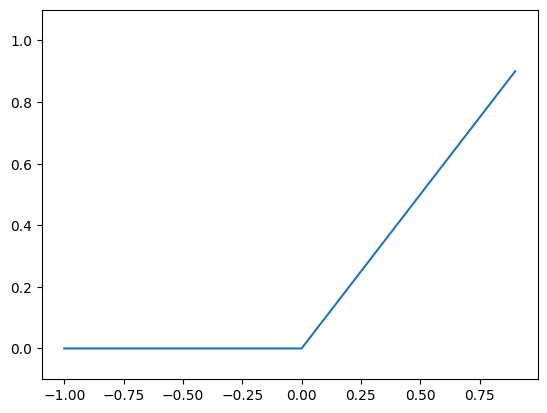

In [5]:
# 3.2.7 ReLU 함수
def relu(x):
    return np.maximum(0,x)

x = np.arange(-1.0, 1.0, 0.1)
y = relu(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

In [6]:
# 3.4.2 각 층의 신호 전달 구현하기
X = np.array([1.0,0.5])
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])

print(W1.shape)
print(B1.shape)
print(X.shape)

A1 = np.dot(X, W1) + B1

Z1 = sigmoid(A1)

print("A1:", A1)
print("Z1", Z1)

W2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2 = np.array([0.1,0.2])

print(W2.shape)
print(B2.shape)
print(Z1.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

print("A2:",A2)
print("Z2:",Z2)

W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1,0.2])

A3 = np.dot(Z2, W3) + B3
Y = A3

print("A3:",A3)
print("Y:",Y)

(2, 3)
(3,)
(2,)
A1: [0.3 0.7 1.1]
Z1 [0.57444252 0.66818777 0.75026011]
(3, 2)
(2,)
(3,)
A2: [0.51615984 1.21402696]
Z2: [0.62624937 0.7710107 ]
A3: [0.31682708 0.69627909]
Y: [0.31682708 0.69627909]


In [7]:
# 3.4.3 구현 정리

def identity_function(x):
    return x

def init_network():
    network = {}
    network['W1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network['b1'] = np.array([0.1,0.2,0.3])
    network['W2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['b2'] = np.array([0.1,0.2])
    network['W3'] = np.array([[0.1,0.3],[0.2,0.4]])
    network['b3'] = np.array([0.1,0.2])

    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return Y

network = init_network()
x = np.array([1.0,0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


In [8]:
# 3.5.1 소프트맥스 함수 구현

def softmax(a):
    c = np.max(a) 
    exp_a = np.exp(a-c) # 3.5.2 소프트맥스 오버플로우 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

In [11]:
# 3.6.1 MNIST 데이터셋

# 내가 임의로 변형했다 책의 코드를
# 데이터셋은 그냥 새로 다운로드 받았다. 

from mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [12]:
# 3.6.1 img show
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28,28) # flatten으로 image가 선형으로 되었으니 reshape로 모양을 바꿔줘야 한다.
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


In [13]:
# 3.6.2 신경망의 추론 처리
import pickle

def get_data():
    # normalize를 이용해 픽셀들이 0에서 1의 값을 가지도록 한다.
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


In [14]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [15]:
# 3.6.3 배치 처리

x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    # batch 또한 행렬로 표현이 되어서 사이즈가 맞으니, predict를 그대로 이용해도 상관없다.
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352
